# Unsupervised Clustering of Days of the Week

In [ ]:
from jupyterworkflow.data import get_fremont_data
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

## Get Data

In [2]:
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2019-02-28 23:00:00,5.0,6.0,11.0
2019-02-28 22:00:00,4.0,27.0,31.0
2019-02-28 21:00:00,16.0,32.0,48.0
2019-02-28 20:00:00,16.0,50.0,66.0
2019-02-28 19:00:00,39.0,59.0,98.0


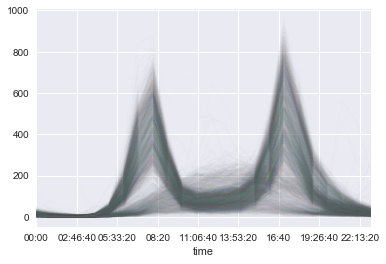

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2340, 24)

If we take the transpose of our pivoted dataset, we can begin to look at how the days relate to eachother. By the shape of our data, we can see that there are 2340 days with 24 hours each.

## Principle Components Analysis

In [5]:
X2 = PCA(2).fit_transform(X)

Now we have a 2d projection of our original data. Of course 2d data is very conducive to plotting and visualization, so this is the next step we will take.

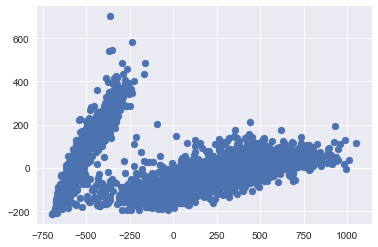

In [6]:
plt.scatter(X2[:,0],X2[:,1])

As is predictable, we have 2 very obvious clusters of days. It turns out that PCA is much more of an EDA step and less of a prediction algorithm.

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0])

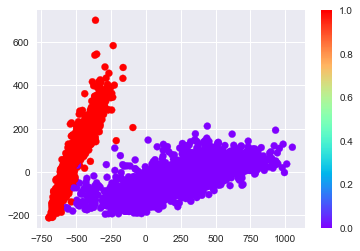

In [8]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Red Cluster')

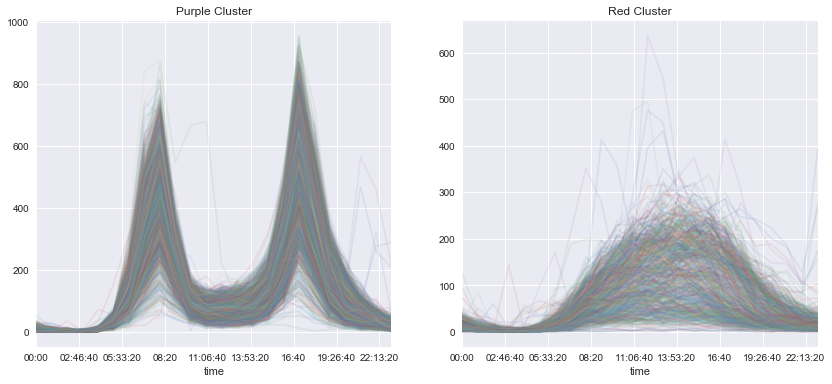

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing Days of the Week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
# get the days of the week

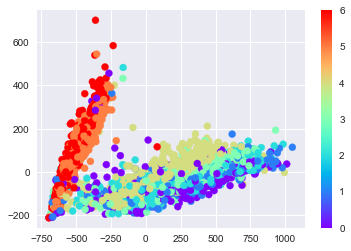

In [11]:
plt.scatter(X2[:,0],X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

Notice that we have the weekdays (0-4) in 1 group, with the weekends (5 and 6) in the other group. However, we also have some weekdays interspersed with the weekends. Perhaps these represent holidays?

## Analyzing Outliers

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==0) & (dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2019-02-15', '2019-02-18', '2019-02-19', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-25', '2019-02-26',
               '2019-02-27', '2019-02-28'],
              dtype='datetime64[ns]', length=1609, freq=None)

Just looking at some of these dates, we have Thanksgiving, Christmas Eve, Christmas, New Years, etc. Then we're clearly seeing weekend behavior on holidays.